In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras import layers 
from keras.models import load_model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing import image_dataset_from_directory
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input

2024-06-25 10:18:38.842055: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-25 10:18:39.314787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 10:18:41.244869: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = tf.keras.utils.image_dataset_from_directory("/home/gabriel/machine_Learning/script/dogs_cats/train/",  image_size=(200, 200))
test = tf.keras.utils.image_dataset_from_directory("/home/gabriel/machine_Learning/script/dogs_cats/test/",  image_size=(200, 200))

Found 557 files belonging to 2 classes.


2024-06-25 10:18:44.097261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 10:18:44.318824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 10:18:44.321956: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 140 files belonging to 2 classes.


2024-06-25 10:18:47.380482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


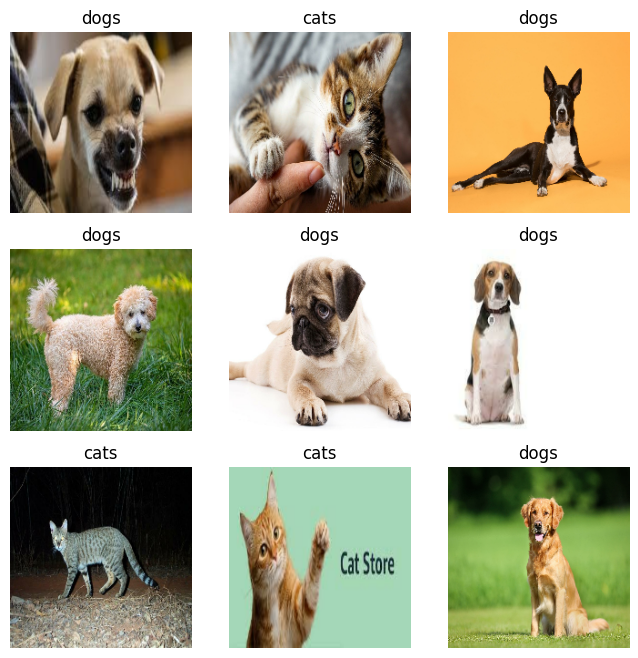

In [3]:
class_names = train.class_names
plt.figure(figsize=(8, 8))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(200, 200, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), 
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), 

    layers.Flatten(), 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'), 
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation='relu'), 
    layers.BatchNormalization(), 
    layers.Dense(1, activation='sigmoid') 
]) 

optimizer = Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 718ms/step - accuracy: 0.5313 - loss: 0.8530 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5841 - loss: 0.8207 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5833 - loss: 0.8032 - val_accuracy: 0.5000 - val_loss: 0.7161
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6419 - loss: 0.7090 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5882 - loss: 0.8155 - val_accuracy: 0.5000 - val_loss: 0.7271
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6072 - loss: 0.7182 - val_accuracy: 0.5000 - val_loss: 0.7208
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.6297 - loss: 0.6871 - val_accuracy: 0.5000 - val_loss: 0.7757
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6059 - loss: 0.7065 - val_accuracy: 

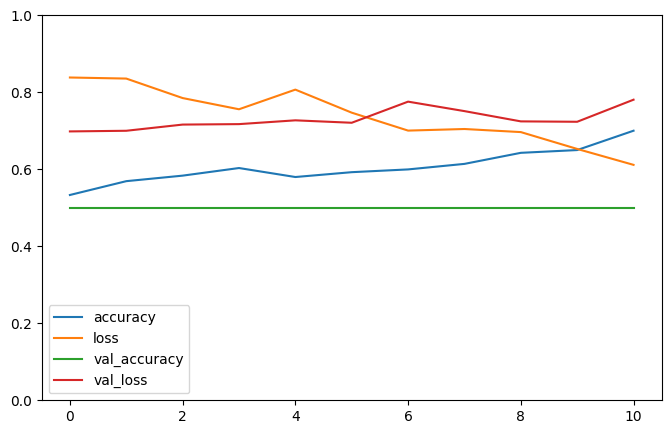

In [21]:
history = model.fit(train, epochs = 100, validation_data = test, callbacks=[early_stopping])
model.save("./model.h5")
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1) 
plt.show()

In [6]:
model = load_model("./model.h5")

In [7]:
images_test = []
labels_test = []

for images, labels in test:
    images_test.append(images.numpy())
    labels_test.append(labels.numpy())

images_array_test = np.concatenate(images_test)
labels_array_test = np.concatenate(labels_test)

2024-06-25 10:20:03.137168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
predictions = model.predict(images_array_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


Accuracy: 0.6428571428571429
F1: 0.5454545454545454
Recall: 0.42857142857142855
Precision: 0.75
AUC: 0.6428571428571429


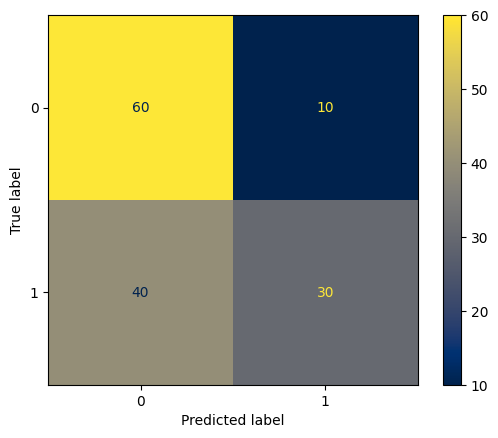

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
y_pred = (predictions > 0.5).astype("int")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(labels_array_test, y_pred))
disp.plot(cmap='cividis', ax=plt.gca())

print("Accuracy:", accuracy_score(labels_array_test, y_pred))
print("F1:", f1_score(labels_array_test, y_pred))
print("Recall:",recall_score(labels_array_test, y_pred))
print("Precision:", precision_score(labels_array_test, y_pred))
print("AUC:", roc_auc_score(labels_array_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
predict: [[0.02402234]]
real: cats


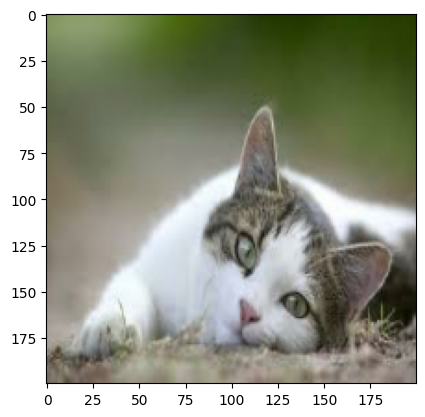

In [10]:
sample_index = np.random.randint(0, 140)
sample = np.expand_dims(images_array_test[sample_index], axis=0)

plt.imshow(images_array_test[sample_index].astype("uint8"))
print('predict:', model.predict(sample))
print('real:', class_names[labels_array_test[sample_index]])